Exercise

In [48]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

I'll be doing my analysis on the Data Scientist's trending skills

In [49]:
df_ds = df[df['job_title_short'] == 'Data Scientist'].copy()

In [50]:
df_ds.sample(7)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
661928,Data Scientist,BI Data Scientist im Bereich Controlling Insights,"Vienna, Austria",via BeBee,Full-time,False,Austria,2023-03-07 11:12:24,False,False,Austria,None,NaN,NaN,Österreichische Post AG,"[python, sql, azure, pytorch, keras]","{'cloud': ['azure'], 'libraries': ['pytorch', ..."
530638,Data Scientist,Senior Data Scientist Jobs in Dubai | Alshaya ...,Dubai - United Arab Emirates,via Trabajo.org,Full-time,False,United Arab Emirates,2023-09-05 19:23:25,False,False,United Arab Emirates,None,NaN,NaN,Alshaya Careers,None,None
686693,Data Scientist,"Principal Data Scientist - AI, Urban Scene Gen...","Vienna, Austria",via The Muse,Full-time,False,Austria,2023-06-17 11:03:05,False,False,Austria,None,NaN,NaN,Esri,"[c++, python, pytorch, linux, ubuntu, docker, ...","{'libraries': ['pytorch'], 'os': ['linux', 'ub..."
621447,Data Scientist,Principal Data Scientist,"Houston, TX",via Monster,Full-time,False,Sudan,2023-02-07 12:47:20,False,True,Sudan,None,NaN,NaN,Randstad USA,None,None
465168,Data Scientist,Data Scientist H/F,"Paris, France",via Indeed,Full-time,False,France,2023-07-06 14:25:59,False,False,France,None,NaN,NaN,Veesion,"[python, sql, docker]","{'other': ['docker'], 'programming': ['python'..."
39527,Data Scientist,Intern - Data Scientist,"Bang Pa-in District, Phra Nakhon Si Ayutthaya,...",via Smart Recruiters Jobs,Internship,False,Thailand,2023-12-22 06:13:57,False,False,Thailand,None,NaN,NaN,Western Digital,"[sql, python, react]","{'libraries': ['react'], 'programming': ['sql'..."
162277,Data Scientist,Data Analytics Specialist,Spain,via Indeed,Full-time,False,Spain,2023-05-30 15:13:17,False,False,Spain,None,NaN,NaN,Welocalize,"[swift, power bi, tableau, looker]","{'analyst_tools': ['power bi', 'tableau', 'loo..."


In [51]:
# We'll be aggregating the skills on a monthly basis

df_ds['month_nos'] = df['job_posted_date'].dt.month

In [52]:
df_ds_exploded = df_ds.explode('job_skills')

df_ds_exploded.pivot_table(index= 'month_nos', columns= 'job_skills', aggfunc= 'size', fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_nos,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [53]:

df_ee_pivot = df_ds_exploded.pivot_table(index= 'month_nos', columns= 'job_skills', aggfunc= 'size', fill_value=0)

Let's filter it down to we can visaualize.
In order to do this, we need to create a new column called total where can sum up all the values to they can be sorted.

In [54]:
df_ee_pivot.loc['Total'] = df_ee_pivot.sum()

df_ee_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_nos,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [55]:
df_ee_pivot = df_ee_pivot[df_ee_pivot.loc['Total'].sort_values(ascending= False).index]  # We use the index and sort values to tell pandas to sort our table by the values in the total column, after that has run, we need to drop the Total column so it doesn't affect our plotting.

df_ee_pivot = df_ee_pivot.drop('Total')

df_ee_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
month_nos,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


I would like to change the month from numbers to their 3 letter identifiers

In [56]:
df_ee_pivot = df_ee_pivot.reset_index()

df_ee_pivot['month'] = df_ee_pivot['month_nos'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_ee_pivot = df_ee_pivot.set_index('month')
df_ee_pivot =df_ee_pivot.drop(columns='month_nos')

In [57]:
df_ee_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
month,,,,,,,,,,,,,,,,,,,,,
Jan,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
Feb,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
Mar,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
Apr,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
Jun,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
Jul,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
Aug,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
Sep,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


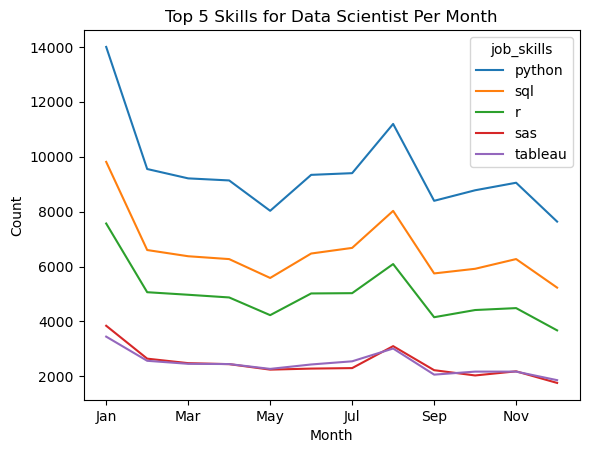

In [58]:
df_ee_pivot.iloc[:, :5].plot(kind= 'line')

plt.title('Top 5 Skills for Data Scientist Per Month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()